<a href="https://colab.research.google.com/github/tzf101/BDA-Bangla-Text-Data-Augmentation/blob/main/evaluation/test_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading BanglaBERT Model

In [20]:
!git clone https://github.com/csebuetnlp/banglabert.git

fatal: destination path 'banglabert' already exists and is not an empty directory.


In [21]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-2vqu_04c
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-2vqu_04c
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done


In [22]:
from normalizer import normalize

In [23]:
!pip install transformers[torch]

In [24]:
!pip install datasets

# Load Libraries

In [25]:
!pip install pandas

In [26]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


# Load Dataset

In [29]:
# Change this base_location
base_location = '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/'

training_dataset_location = base_location + 'train_50.csv'
dev_dataset_location = base_location + 'validation.csv'
test_dataset_location = base_location + 'test.csv'

In [30]:
train_df = pd.read_csv(training_dataset_location)
validation_df = pd.read_csv(dev_dataset_location)
test_df = pd.read_csv(test_dataset_location)

In [31]:
train_df

sentence1  label
0                  ‡¶≠‡¶æ‡¶á ‡¶®‡ßá‡¶ï‡ßç‡¶∏‡¶ü ‡¶ü‡¶æ‡¶á‡¶Æ ‡¶®‡¶ñ ‡¶ï‡ßá‡¶ü‡ßá ‡¶ï‡¶á‡¶∞‡ßá‡¶® ‡¶≠‡ßç‡¶≤‡¶ó‡¶ø‡¶Ç      0
1                             ‡¶è‡¶∞‡¶æ ‡¶ò‡ßã‡¶∑ ‡¶õ‡¶æ‡ßú‡¶æ ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶¨‡ßÅ‡¶ú‡ßá ‡¶®‡¶æ      2
2                              ‡¶π‡¶æ‡¶§‡¶ü‡¶æ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¨‡ßá‡¶∂‡¶ø ‡¶®‡¶æ‡¶∞‡¶æ‡¶ö‡ßç‡¶õ‡ßá      2
3     ‡¶Ü‡¶™‡¶®‡¶ø ‡¶ï‡ßã‡¶® ‡¶Æ‡¶æ‡¶∏‡ßá ‡¶ó‡¶ø‡ßü‡ßá‡¶õ‡¶ø‡¶≤‡ßá‡¶® ‡¶Ö‡¶®‡ßá‡¶ï‡ßá ‡¶¨‡¶≤‡ßá ‡¶ú‡¶æ‡¶®‡ßÅ‡ßü‡¶æ‡¶∞‡ßÄ ‡¶§‡ßá ...      1
4     ‡¶ì‡ßü‡¶æ‡¶≤‡¶æ‡¶á‡¶ï‡ßÅ‡¶Æ ‡¶Ü‡¶∏‡¶∏‡¶æ‡¶≤‡¶æ‡¶Æ ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶¶‡ßã‡¶ï‡¶æ‡¶® ‡¶ï‡ßã‡¶•‡¶æ‡ßü ‡¶∏‡ßç‡¶™‡ßá‡¶∂‡¶æ‡¶≤ ‡¶ï‡¶ø...      1
...                                                 ...    ...
6286                    ‡¶Ø‡¶æ‡¶∞ ‡¶Ü‡¶∞‡¶¨‡ßÄ ‡¶Ö‡¶®‡ßÅ‡¶¨‡¶æ‡¶¶ ‡¶π‡ßü ‡¶¨‡¶æ‡¶≤‡¶æ‡¶¶‡ßÅ‡¶≤ ‡¶Ü‡¶Æ‡¶ø‡¶®      0
6287                              ‡¶ï‡¶æ‡¶†‡¶ø ‡¶¶‡¶ø‡ßü‡ßá‡¶ì ‡¶π‡¶æ‡¶§‡ßá‡¶∞ ‡¶∏‡¶æ‡¶á‡¶ú      1
6288                      ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶¨‡¶æ‡¶ö‡¶æ‡¶á‡¶õ‡ßá ‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π      1
6289                ‡¶™‡¶∞‡¶ø‡¶¨‡ßá‡¶∂‡¶ü‡¶æ ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶®‡¶æ ‡¶≠‡¶æ‡¶á ‡¶ï‡¶®‡ßã ‡¶π‡ßà‡¶õ‡ßà ‡¶Ü‡¶õ‡ßá      1
6290  ‡¶á‡¶ü‡¶æ ‡¶è‡¶ï‡¶ü‡¶æ ‡¶Ö‡¶Æ‡¶æ‡¶®‡¶¨‡¶ø‡¶ï ‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞ ‡¶Ø‡ßá ‡¶≠‡¶ø‡¶°‡¶ø‡¶ì ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶® ‡¶ï‡¶ñ‡¶®‡ßã ‡¶ñ...      1

[6291 rows x 2 columns]

In [32]:
validation_df

sentence1  label
0     ‡¶Ü‡¶Æ‡¶ø ‡¶¨‡ßÅ‡¶ú‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶ø ‡¶®‡¶æ ‡¶ì‡¶∞‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞‡¶ï‡ßá ‡¶§‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶∞ ‡¶™‡¶æ‡¶®‡¶ø ‡¶¶‡ßá...      0
1     ‡¶ú‡¶§ ‡¶¶‡¶ø‡¶® ‡¶ú‡¶æ‡¶ö‡ßç‡¶õ‡ßá ‡¶§‡¶§ ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶≠‡¶ø‡¶°‡¶ø‡¶ì ‡¶¨‡ßá‡¶∞ ‡¶π‡¶ö‡ßç‡¶õ‡ßá ‡¶¶‡ßá‡¶ñ‡ßá ...      1
2     ‡¶¨‡¶∞‡ßç‡¶°‡¶æ‡¶∞‡ßá ‡¶Ö‡¶®‡ßá‡¶ï ‡¶≤‡ßá‡¶ü ‡¶π‡ßü‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶§‡ßá ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶ú‡¶ø‡¶™‡ßá ‡¶ï‡¶∞‡ßá ‡¶ö‡¶≤‡ßá...      1
3     ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶∏‡ßã‡¶®‡¶æ‡¶∞ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶§‡ßá ‡¶è‡¶Æ‡¶® ‡¶∞‡¶ï‡ßç‡¶∑‡¶ï ‡¶®‡¶æ‡¶Æ‡ßá‡¶∞ ‡¶≠‡¶ï‡ßç‡¶∑‡¶ï‡ßá‡¶∞ ‡¶ï‡ßã‡¶®...      2
4     ‡¶ì‡¶®‡¶æ‡¶∞‡¶æ ‡¶è‡¶§ ‡¶π‡¶æ‡¶á‡¶ú‡¶ø‡¶®‡¶ø‡¶ï ‡¶ì ‡¶è‡¶§ ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶™‡¶∞‡¶ø‡¶¨‡ßá‡¶∂‡ßá ‡¶∞‡¶æ‡¶®‡ßç‡¶®‡¶æ ‡¶ï...      1
...                                                 ...    ...
1569                         ‡¶Ü‡¶∞ ‡¶¨‡¶ø‡¶ö‡¶æ‡¶∞ ‡¶π‡¶¨‡ßá ‡¶¨‡¶≤‡ßá ‡¶Æ‡¶®‡ßá ‡¶π‡ßü ‡¶®‡¶æ      2
1570  ‡¶≠‡¶æ‡¶á ‡¶∞‡¶æ‡¶§‡ßá ‡¶ó‡ßá‡¶≤‡ßá ‡¶™‡¶æ‡¶¨‡ßá‡¶®  ‡¶Ö‡¶•‡¶¨‡¶æ  ‡¶è‡¶á ‡¶®‡¶æ‡¶Æ‡ßç‡¶¨‡¶æ‡¶∞ ‡¶≤‡ßã‡¶ï‡¶Æ‡¶æ‡¶® ‡¶≠...      1
1571  ‡¶Ü‡¶Æ‡¶æ‡¶ï‡ßá ‡¶Ø‡ßá ‡¶¶‡¶ø‡¶® ‡¶Ø‡ßá‡¶á ‡¶§‡¶æ‡¶∞‡¶ø‡¶ñ ‡¶è ‡¶°‡¶ï‡ßç‡¶ü‡¶∞ ‡¶è‡ßç‡¶Ø‡¶æ‡¶™‡¶Ø‡¶º‡ßá‡¶®‡¶Æ‡ßá‡¶®‡ßç‡¶ü ...      1
1572  ‡¶Ü‡¶∞‡ßá ‡¶≠‡¶æ‡¶á ‡¶è‡¶ñ‡¶æ‡¶® ‡¶•‡ßá‡¶ï‡ßá ‡¶§‡ßã ‡¶∞‡¶æ‡¶ú‡¶®‡ßÄ‡¶§‡¶ø ‡¶ï‡¶∞‡ßá ‡¶¨‡ßú ‡¶π‡¶ö‡ßç‡¶õ‡ßá ‡¶Ü‡¶∞ ‡¶Ø...      2
1573  ‡¶ï‡ßá‡¶®‡¶®‡¶æ ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶Ü‡¶∞‡ßá‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶® ‡¶õ‡¶ø‡¶ï ‡¶Ø‡ßá ‡¶°‡ßç‡¶∞‡ßá‡¶∏ ‡¶õ‡ßá‡¶≤‡ßá‡¶¶‡ßá‡¶∞...      0

[1574 rows x 2 columns]

In [33]:
test_df

sentence1  label
0     ‡¶≠‡¶æ‡¶á ‡¶Æ‡¶æ‡¶õ ‡¶π‡¶æ‡¶∏‡ßá‡¶∞ ‡¶ó‡ßÅ‡¶∏‡ßç‡¶§ ‡¶Ü‡¶∞ ‡¶∞‡ßÅ‡¶ü‡¶ø ‡¶õ‡¶æ‡ßú‡¶æ ‡¶¨‡¶æ‡¶ï‡¶ø ‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞ ‡¶¨‡ßá...      2
1     ‡¶Ü‡¶∏‡¶≤‡ßá ‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞ ‡¶ó‡ßç‡¶∞‡¶π‡¶£‡ßá‡¶∞ ‡¶â‡¶™‡¶∞‡¶á ‡¶®‡¶ø‡¶∞‡ßç‡¶≠‡¶∞ ‡¶ï‡¶∞‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞ ‡¶∂‡¶∞‡ßÄ‡¶∞‡ßá...      0
2     ‡¶≠‡¶æ‡¶á‡ßü‡¶æ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶ï‡¶ó‡ßç‡¶∞‡¶æ‡¶â‡¶®‡ßç‡¶° ‡¶Æ‡¶ø‡¶â‡¶ú‡¶ø‡¶ï ‡¶ü‡¶æ ‡¶¨‡ßá‡¶∂‡¶ø ‡¶π‡ßü‡ßá ‡¶ó‡ßá‡¶õ‡ßá ‡¶Ü‡¶∞...      2
3                        ‡¶¶‡ßü‡¶æ‡¶Æ‡ßü ‡¶Ü‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶§‡¶æ‡¶¶‡ßá‡¶∞‡¶ï‡ßá ‡¶¨‡¶æ‡¶ö‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®      1
4                  ‡¶∏‡ßç‡¶Ø‡¶æ‡¶≤‡ßÅ‡¶ü ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ö‡ßç‡¶Ø‡¶æ‡¶®‡ßá‡¶≤ ‡¶ì ‡¶∏‡¶æ‡¶π‡¶∏‡¶ø‡¶ï‡¶§‡¶æ‡¶ï‡ßá      1
...                                                 ...    ...
1567  ‡¶¨‡ßá‡¶ü‡¶æ ‡¶≠‡¶æ‡¶≤‡ßã ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶∂‡¶ø‡¶ñ ‡¶¨‡¶ø‡¶ß‡¶∞‡ßç‡¶Æ‡¶ø ‡¶¶‡ßá‡¶∞ ‡¶è‡¶∏‡¶¨ ‡¶ï‡¶™‡¶ø ‡¶ï‡¶∞‡ßá ‡¶ï‡¶ø ‡¶≤‡¶æ‡¶≠      2
1568  ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑ ‡¶Ö‡¶§‡¶ø‡¶∑‡ßç‡¶† ‡¶π‡ßü‡ßá‡¶õ‡ßá ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶§‡¶æ‡¶∞‡¶™‡¶∞‡¶ì ‡¶•‡¶æ‡¶®‡¶æ‡ßü ‡¶Ø‡ßá‡ßü‡ßá ‡¶¨‡¶ø...      2
1569  ‡¶∏‡¶æ‡¶∞‡¶æ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞ ‡¶è‡¶ï‡¶ü‡¶æ ‡¶¶‡¶æ‡¶¨‡¶ø ‡¶≠‡ßÅ‡ßü‡¶æ ‡¶≤‡¶ü‡¶æ‡¶∞‡¶ø ‡¶ï...      1
1570             ‡¶°‡¶ø‡¶∏‡ßá‡¶Æ‡¶¨‡¶∞‡ßá ‡¶∂‡ßá‡¶∑‡ßá‡¶∞ ‡¶¶‡¶ø‡¶ï‡ßá ‡¶ó‡ßá‡¶≤‡ßá ‡¶¨‡¶∞‡¶´ ‡¶™‡¶æ‡¶¨‡ßã ‡¶¶‡¶æ‡¶¶‡¶æ      0
1571  ‡¶Ö‡¶®‡ßá‡¶ï ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶∞‡¶æ‡¶∏‡ßç‡¶§‡¶æ ‡¶¶‡¶æ‡¶∞‡ßç‡¶ú‡¶ø‡¶≤‡¶ø‡ßü‡ßá‡¶∞ ‡¶Ø‡¶æ ‡¶è‡¶ñ‡¶® ‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§ ...      1

[1572 rows x 2 columns]

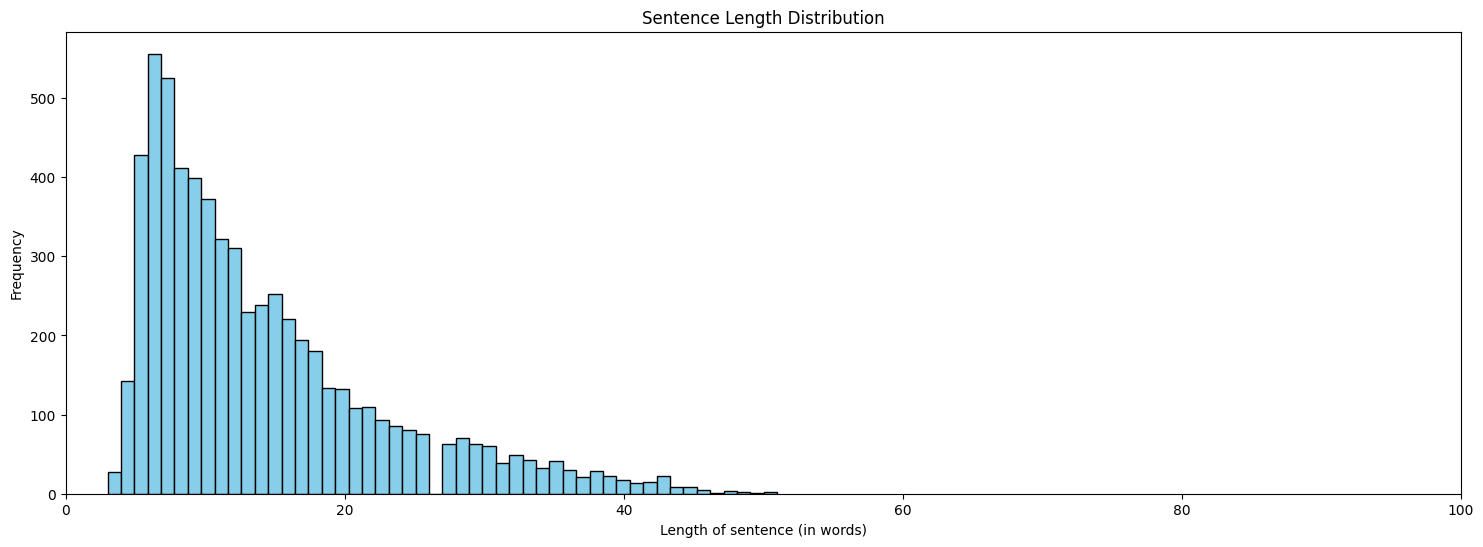

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating length of each sentence without modifying the original DataFrame
# Calculating length of each sentence without modifying the original DataFrame
sentence_lengths = train_df['sentence1'].apply(lambda x: len(x.split()))

# Plotting the length distribution with more bins
plt.figure(figsize=(18, 6))
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black')  # Adjusting bins to the number of unique lengths
plt.title('Sentence Length Distribution')
plt.xlabel('Length of sentence (in words)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Setting the x-axis range from 0 to 150
plt.show()

In [35]:
train_size = len(train_df)
dev_size = len(validation_df)
test_size = len(test_df)

In [36]:
total = train_size + test_size + dev_size
train_percentage = (train_size / total) * 100
test_percentage = (test_size / total) * 100
dev_percentage = (dev_size / total) * 100

In [37]:
print(train_percentage, test_percentage, dev_percentage)

66.66313447070044 16.657836176751086 16.67902935254848


# Training
Modify the:
- --train_file {dir}
- --validation {dir}
- --test_file {dir}

If needed, adjust
- --learning_rate {number}
- --per_device_train_batch_size {int}
- --per_device_eval_batch_size {int}
- --max_seq_length {int}
- --num_train_epochs {int}

In [ ]:
!python banglabert/sequence_classification/sequence_classification.py \
    --model_name_or_path "csebuetnlp/banglabert" \
    --train_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/train_100.csv' \
    --validation_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/validation.csv' \
    --test_file '/content/MyDrive/MyDrive/Research/Thesis: BDA/Main/evaluation/sentnob/cleaned_original/test.csv' \
    --output_dir "/output/" \
    --learning_rate=2e-5 \
    --warmup_ratio 0.1 \
    --gradient_accumulation_steps 2 \
    --weight_decay 0.1 \
    --lr_scheduler_type "linear"  \
    --per_device_train_batch_size=8 \
    --per_device_eval_batch_size=8 \
    --max_seq_length 256 \
    --logging_strategy "epoch" \
    --evaluation_strategy "epoch" \
    --num_train_epochs=6 \
    --overwrite_output_dir \
    --do_train --do_eval --do_predict

2024-01-28 14:59:32.119149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 14:59:32.119213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 14:59:32.121197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 14:59:33.918586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
01/28/2024 14:59:35 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: True, 16-bits training: False
[WARNING|modeling_utils.py:3952] 2024-01-28 14:59:42,057 >> Some weights of ElectraForSequenceClassificat

# Instruction
Add the Predict output to notion
https://www.notion.so/tariq190041101/Results-34ba8a1c07474cb2b2d85d01c0f39e3f?pvs=4